In [1]:
import pandas as pd

In [5]:
# Load the dataset
data = pd.read_csv(r"C:\Users\gajen\OneDrive\Desktop\Dataset .csv")

In [7]:
# print the data
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [15]:
# Drop missing values in the 'Cuisines' column and split multiple cuisines
all_cuisines = data['Cuisines'].dropna().str.split(', ').explode()

# Count frequency of each cuisine and get top 3
top_3_cuisines = all_cuisines.value_counts().head(3)

# Display the top 3 cuisines
print(top_3_cuisines)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [17]:
# Calculate and print percentage for each of the top 3 cuisines
for cuisine, count in top_3_cuisines.items():
    percentage = (count / total_restaurants) * 100
    print(f"{cuisine}: {percentage:.2f}% of restaurants")

North Indian: 41.50% of restaurants
Chinese: 28.66% of restaurants
Fast Food: 20.81% of restaurants


In [19]:
# Count the number of restaurants per city
city_counts = data['City'].value_counts()

# Get the city with the highest number
top_city = city_counts.idxmax()
top_count = city_counts.max()

# Display the result
print(f"The city with the highest number of restaurants is: {top_city} ({top_count} restaurants)")


The city with the highest number of restaurants is: New Delhi (5473 restaurants)


In [23]:
# Group by city and calculate the average of 'Aggregate rating'
average_ratings = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Display the average ratings for each city
print(average_ratings)

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [28]:
highest_average_ratings_city = average_ratings.head(1)
print(highest_average_ratings_city)

City
Inner City    4.9
Name: Aggregate rating, dtype: float64


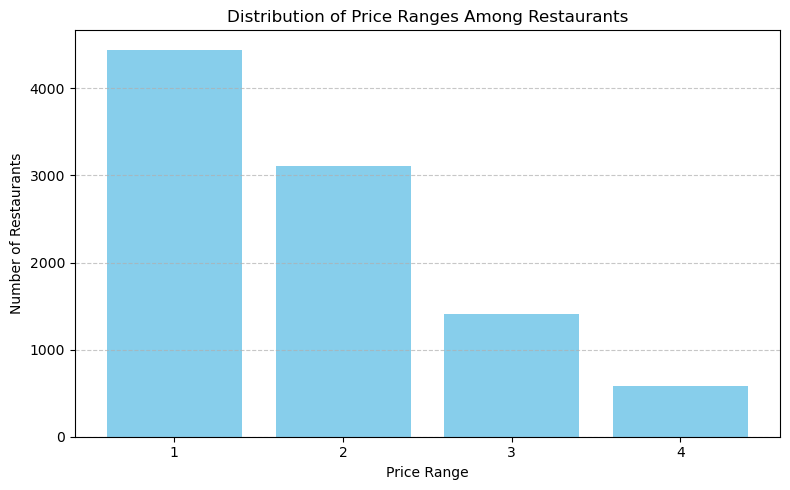

In [32]:
import matplotlib.pyplot as plt

# Count the number of restaurants in each price range
price_range_counts = data['Price range'].value_counts().sort_index()
# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(price_range_counts.index.astype(str), price_range_counts.values, color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(price_range_counts.index.astype(str))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
total_restaurants = data.shape[0]
price_range_percentages = (price_range_counts / total_restaurants) * 100
# Display the percentages
for price_range, percentage in price_range_percentages.items():
    print(f"Price Range {price_range}: {percentage:.2f}% of restaurants")

Price Range 1: 46.53% of restaurants
Price Range 2: 32.59% of restaurants
Price Range 3: 14.74% of restaurants
Price Range 4: 6.14% of restaurants


In [36]:
online_delivery_counts = data['Has Online delivery'].value_counts()

# Total number of restaurants
total_restaurants = data.shape[0]

# Calculate percentage of restaurants that offer online delivery
if 'Yes' in online_delivery_counts:
    percentage_online = (online_delivery_counts['Yes'] / total_restaurants) * 100
else:
    percentage_online = 0.0

# Display the result
print(f"Percentage of restaurants that offer online delivery: {percentage_online:.2f}%")


Percentage of restaurants that offer online delivery: 25.66%


In [38]:
# Filter restaurants based on online delivery availability
online_delivery_yes = data[data['Has Online delivery'] == 'Yes']
online_delivery_no = data[data['Has Online delivery'] == 'No']

# Calculate average rating for each group
avg_rating_yes = online_delivery_yes['Aggregate rating'].mean()
avg_rating_no = online_delivery_no['Aggregate rating'].mean()

# Display the results
print(f"Average rating (Online Delivery = Yes): {avg_rating_yes:.2f}")
print(f"Average rating (Online Delivery = No): {avg_rating_no:.2f}")

Average rating (Online Delivery = Yes): 3.25
Average rating (Online Delivery = No): 2.47
